In [139]:
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import d_fuzzy_stream as fuzzy
from datetime import datetime

In [140]:
data = pd.read_csv('https://raw.githubusercontent.com/vpozdnyakov/DS_Datasets/master/Synthetic/Non-Stationary/Bench1_11k/Benchmark1_11000.csv')
data.head()

,X1,X2,class
0,0.118788,0.890228,1.0
1,0.107214,0.102574,2.0
2,0.088860,0.899348,1.0
3,0.077085,0.089380,2.0
4,0.113830,0.885728,1.0


In [171]:
res = {'purity': [], 
       'creations': [], 
       'removals': [], 
       'merges': [], 
       'absorptions': [], 
       'seconds': []}
reload(fuzzy)
n = 1000
last = ([False] * (n-1))
last.append(True)

datastream = data.iloc[:n]
datastream = datastream.rename(columns={'class': 'target'})
datastream = datastream.rename(columns={'X1': 'x', 'X2': 'y'})
datastream['last'] = pd.Series(last)
datastream = datastream.fillna(3)

fs = fuzzy.dFuzzyStream()
s = datetime.now()
fs.clustering(datastream, test=True)
f = datetime.now()

res['purity'].append(fs.purity)
res['creations'].append(fs.creations)
res['removals'].append(fs.removals)
res['merges'].append(fs.merges)
res['absorptions'].append(fs.absorptions)
res['seconds'].append((f - s).seconds)
pd.DataFrame(res)

,purity,creations,removals,merges,absorptions,seconds
0,0.005,843,542,101,157,270


In [176]:
fs.to_dataframe()

,x,y,radius,new
0,0.249522,0.236763,0.000066,False
1,0.235983,0.218568,0.000068,False
2,0.249967,0.262533,0.000079,False
3,0.240616,0.248735,0.000249,False
4,0.244688,0.248678,0.000244,False
...,...,...,...,...
195,0.232925,0.771377,0.000126,False
196,0.241088,0.253476,0.000079,False
197,0.249652,0.762499,0.000340,False
198,0.221743,0.221987,0.000064,False


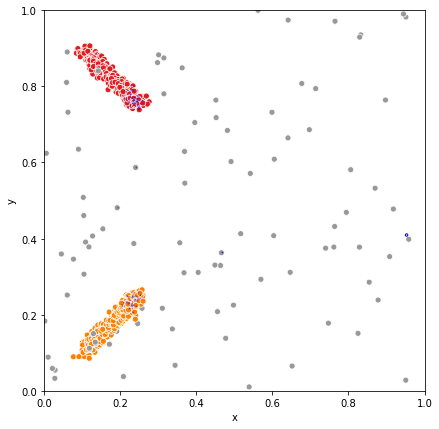

In [172]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect(1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
for i_fc in fs.to_dataframe().itertuples():
    fill = True if i_fc.new else False
    alpha = 0.05 if i_fc.new else 1    
    circle = plt.Circle((i_fc.x, i_fc.y), 
                        i_fc.radius, 
                        color='b', 
                        fill=fill, 
                        alpha=alpha)
    ax.add_artist(circle)
sns.scatterplot(
    x="x",
    y="y",
    hue="target",
    style='last',
    data=datastream, 
    legend=False, 
    palette="Set1")\
    .get_figure().savefig('sample_plot.pdf')
plt.show()